# Visualizaciones básicas

Para visualizar datos, la librería por defecto en python es `matplotlib`.
Prácticamente todas las demás librerías para visualizaciones se basan en esta, así que conviene aprenderla primero.


## Cargar datos

In [ ]:
import pandas as pd
# así como para pandas la convención es importarla como pd
# para matplotlib la convensión es:
import matplotlib.pyplot as plt

path = '/content/base_tut_1.xlsx'
df = pd.read_excel(path)
df['imc'] = df['peso']/df['talla']**2
# PAM = PAS + (2 × PAD)/3
df['TAM'] = ((df['TAS'] + df['TAD']*2)/3).round(2)
df.head()

,id,edad,sexo,peso,talla,TAS,TAD,HAS,DM2,imc,TAM
0,1,28.0,F,113.5,1.54,142.0,79.0,NO,SI,47.857986,100.00
1,2,46.0,M,122.5,1.76,117.0,74.0,SI,NO,39.546746,88.33
2,3,54.0,F,120.0,1.50,140.0,70.0,SI,SI,53.333333,93.33
3,4,38.0,F,102.0,1.60,110.0,70.0,NO,NO,39.843750,83.33
4,5,40.0,F,118.0,1.78,114.0,80.0,NO,SI,37.242772,91.33


## Tips básicos


### La gráfica básica se produce con la función "plot" que solicita un parámetro x y otro y:

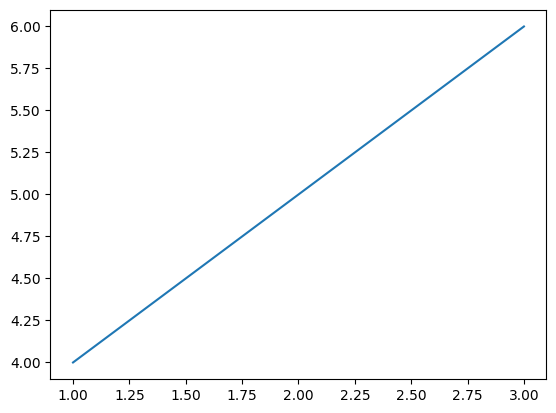

In [ ]:
x = [1,2,3]
y = [4,5,6]
plt.plot(x, y)
plt.show() # poner al final para visualizar el gráfico en forma limpia

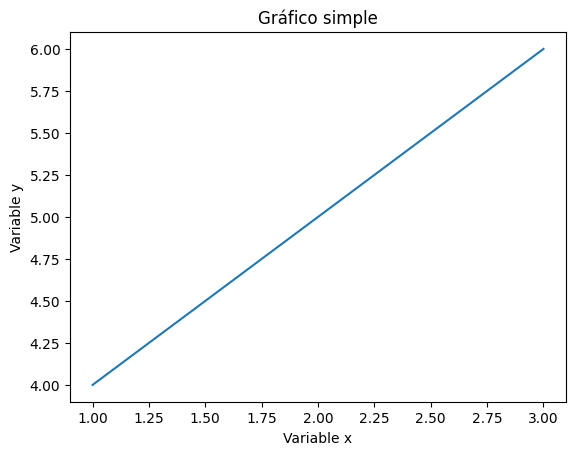

In [ ]:
# agregar título general y de ejes:
# título
plt.plot(x, y)
plt.title('Gráfico simple')
plt.xlabel('Variable x')
plt.ylabel('Variable y')
plt.show()

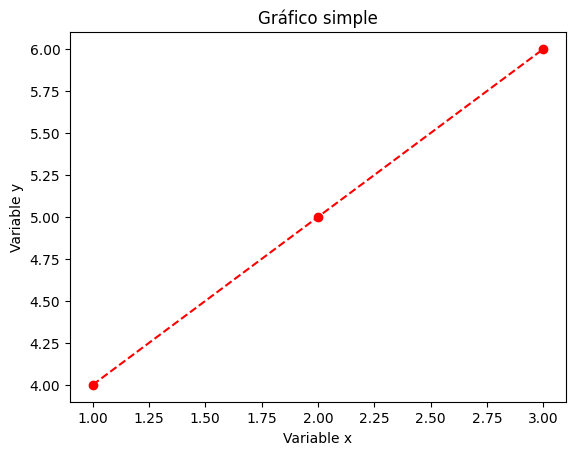

In [ ]:
# cambiar tipo de linea y marcadores
plt.plot(x, y, 'o--r') # el tercer parámetro define el formato.
plt.title('Gráfico simple')
plt.xlabel('Variable x')
plt.ylabel('Variable y')
plt.show()

### Formatos disponibles en plot

[Documentación](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)


[Otros Ejemplos](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#examples-using-matplotlib-pyplot-plot)

## Ejemplo de gráfico de dispersión

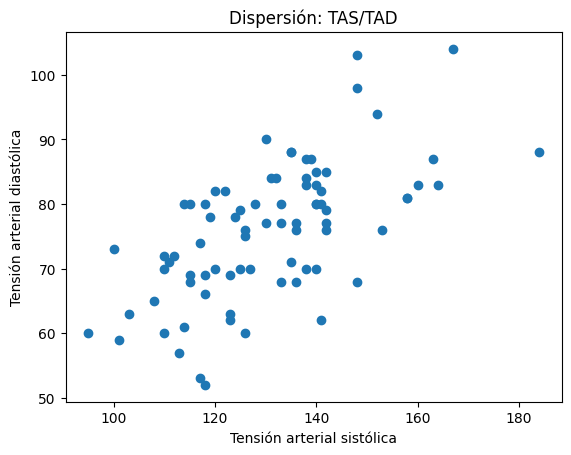

In [ ]:
plt.plot(df['TAS'], df['TAD'], 'o')
# en los parámetros X y Y puedo pasar series de datos
plt.title('Dispersión: TAS/TAD')
plt.xlabel('Tensión arterial sistólica')
plt.ylabel('Tensión arterial diastólica')
plt.show()

## Ejemplo de gráfico de barras


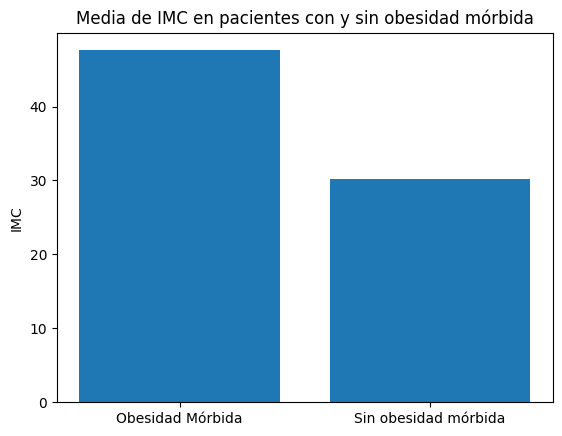

In [ ]:
df['imc'] = df['peso'] / df['talla']**2
morb = df['imc'] > 35
mean_morb = df[morb]['imc'].mean()
mean_no_morb = df[~morb]['imc'].mean()

x = ['Obesidad Mórbida', 'Sin obesidad mórbida']
y = [mean_morb, mean_no_morb]
plt.bar(x, y)
plt.title('Media de IMC en pacientes con y sin obesidad mórbida')
plt.ylabel('IMC')
plt.show()

La base es la misma, pero en el eje x utilizamos una variable categórica y en el y una numérica.

### Otro ejemplo de barras:



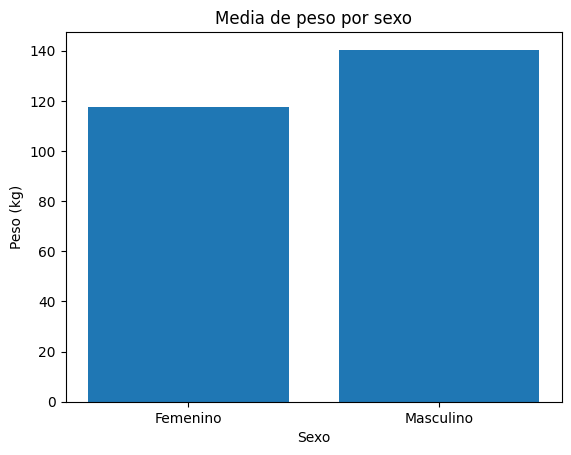

In [ ]:
M = df[df['sexo']=='M']['peso'].mean()
F = df[df['sexo']=='F']['peso'].mean()

plt.bar(['Femenino', 'Masculino'], [F, M])
plt.title('Media de peso por sexo')
plt.xlabel('Sexo')
plt.ylabel('Peso (kg)')
plt.show()

## Visualizar distribuciones (histogramas)


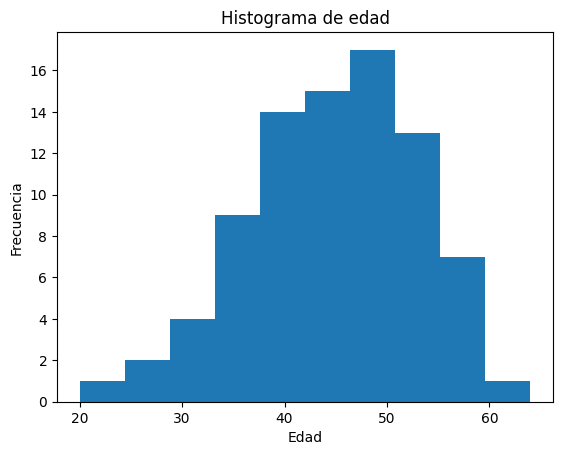

In [ ]:
plt.hist(df['edad'])
plt.title('Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

## Gráfico de pie


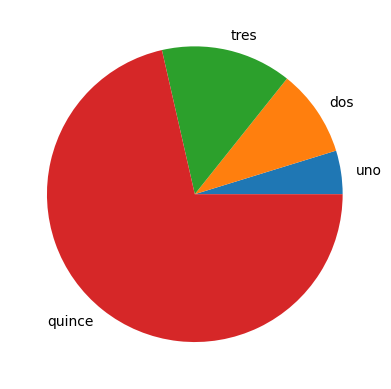

In [ ]:
datos = [1,2,3,15]
etiquetas = ['uno', 'dos', 'tres', 'quince']
plt.pie(datos, labels=etiquetas);

# Visualizaciones avanzadas
Aunque matplotlib es la base de casi todos los gráficos, hay librerías que son de más alto nivel (programático).

## Seaborn
Seaborn es una librería de alto nivel que produce visualizaciones muy bonitas.
Consulta la [galería](https://seaborn.pydata.org/examples/index.html).

In [ ]:
import seaborn as sns # también es convención

#### Gráficos de distribución

### KDE (densidad)


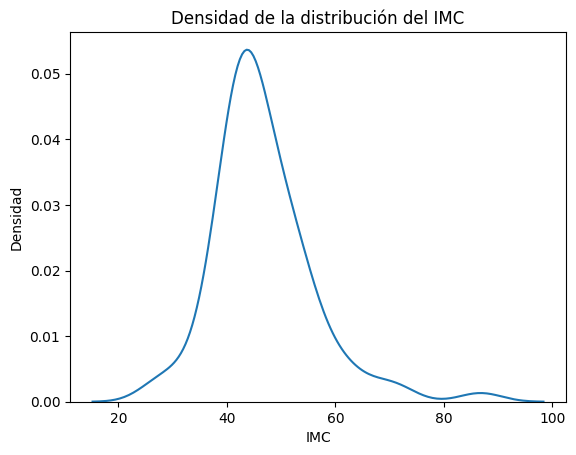

In [ ]:
sns.kdeplot(df['imc'])
plt.title('Densidad de la distribución del IMC')
# Nota cómo seguimos utilizando matplotlib.pyplot para
# personalizar el gráfico
plt.xlabel('IMC')
plt.ylabel('Densidad')
plt.show()

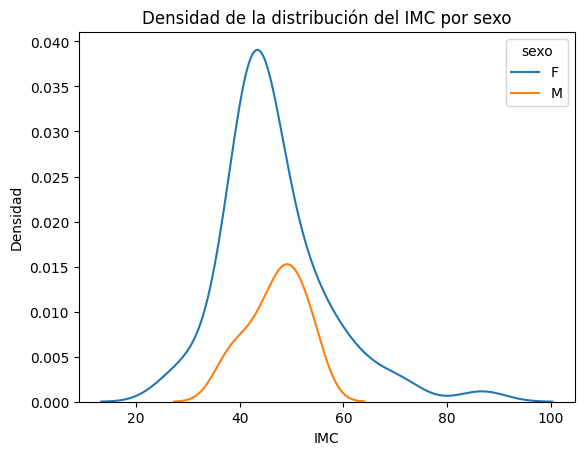

In [ ]:
sns.kdeplot(df, x='imc', hue='sexo')
# el parámetro hue le dice a la función que separe por sexo
plt.title('Densidad de la distribución del IMC por sexo')
# Nota cómo seguimos utilizando matplotlib.pyplot para
# personalizar el gráfico
plt.xlabel('IMC')
plt.ylabel('Densidad')
plt.show()

Observa que crear gráficos diferenciados por categorías es muy sencillo.

### boxplot (caja y brazos)

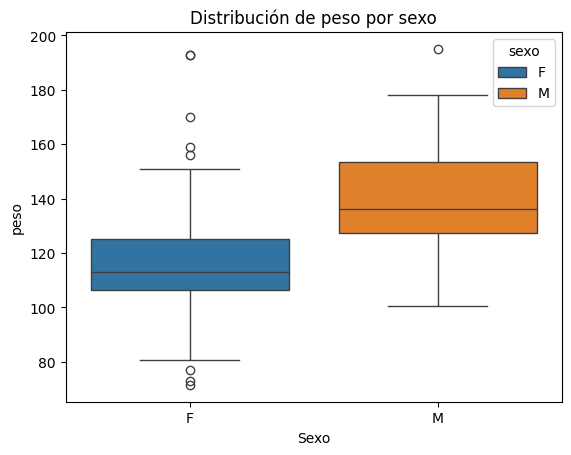

In [ ]:
sns.boxplot(df, x='sexo', y='peso', hue='sexo')
plt.title('Distribución de peso por sexo')
# Nota cómo seguimos utilizando matplotlib.pyplot para
# personalizar el gráfico
plt.ylabel('peso')
plt.xlabel('Sexo')
plt.show()

#### Otro ejemplo con"Hue"

<Axes: xlabel='TAM', ylabel='imc'>

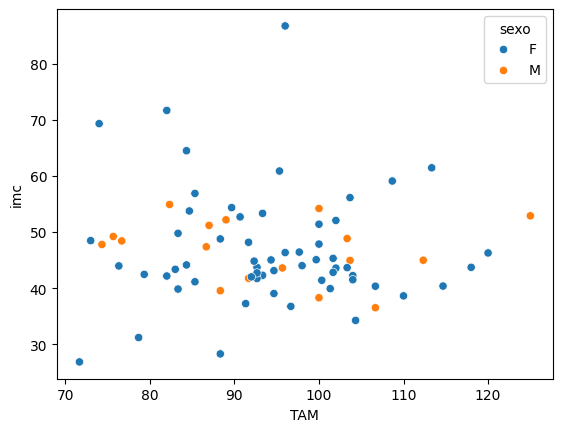

In [ ]:
sns.scatterplot(df, x='TAM', y='imc', hue='sexo')

### Cuentas

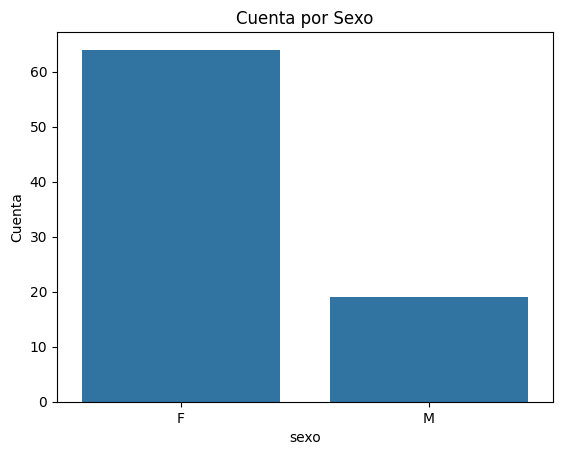

In [ ]:
sns.countplot(df, x='sexo')
plt.title('Cuenta por Sexo')
plt.ylabel('Cuenta')
plt.show()

### visualizaciones complejas




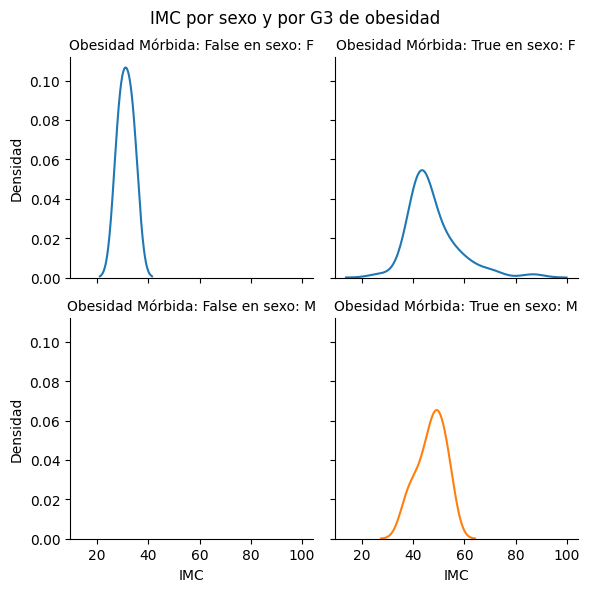

In [ ]:
def grado_obe(imc):
  if imc < 25:
    return 'Sano'
  elif 28 <= imc < 30:
    return 'G1'
  elif 30 <= imc < 35:
    return 'G2'
  else:
    return 'G3'

df['grado obesidad'] = df['imc'].apply(grado_obe)
df['G3'] = df['grado obesidad']=='G3'

g = sns.FacetGrid(df, col='G3', row='sexo', hue='sexo')
g.map(sns.kdeplot, 'imc')
g.fig.subplots_adjust(top=0.9) # Ajustar figuras para acomodar título
g.fig.suptitle('IMC por sexo y por G3 de obesidad') # título general
g.set_titles("Obesidad Mórbida: {col_name} en sexo: {row_name}") # títulos para cada gráfico
g.set_axis_labels('IMC', 'Densidad') # rótulos de ejes X, Y
plt.show()

## Statsmodels (para Q-Q)
Los gráficos Q-Q son útiles para identificar si los datos se ajustan a una distribución específica, frecuentemente la normal.

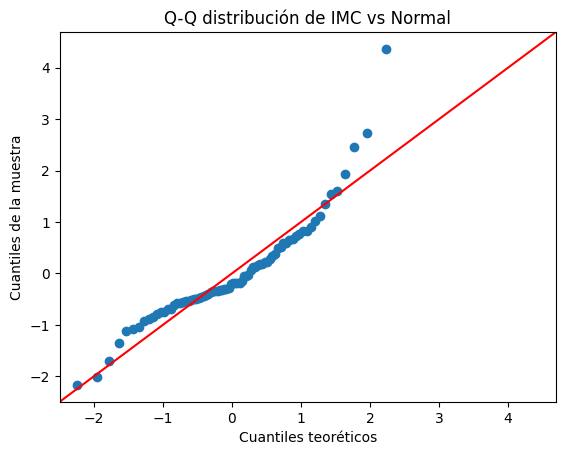

In [ ]:
import statsmodels.api as sm #convención

sm.qqplot(df['imc'].dropna(), line='45', fit=True)
# el parámetro line dice cómo ajustar la línea al gráfico
# el parámetro fit, convierte los datos a la escala de la
# distribución teórica, en la normal, se convierten a
# puntuaciones Z.
plt.title('Q-Q distribución de IMC vs Normal')
plt.xlabel('Cuantiles teoréticos')
plt.ylabel('Cuantiles de la muestra')
plt.show()

Puede observarse como hay una cola derecha muy pesada, lo que corresponde con nuestro análisis de los datos.

## Gráficos de Volcan

In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

# Simulación de datos para el gráfico de volcán
n = 1000
# Genera tamaños de efecto como valores absolutos de una distribución normal
ef = stats.gamma.rvs(a=2, scale=0.5, size=n)  # Gamma con más valores grandes

# Convierte los tamaños de efecto a escala log2 (evitando log2(0) sumando 0.01)
ef_log2 = np.log2(ef + 0.01)

# Crea una lista de etiquetas de genes (gen1, gen2, ..., gen100)
labels = [f'gen{n}' for n in range(1, n+1)]

# Genera valores p: 70 no significativos (0.2-1.0) y 30 significativos (0.0001-0.05)
ps = np.concatenate([
    np.random.uniform(0.05, 0.3, size=round(n*0.7)),
    np.random.uniform(0.0001, 0.05, size=round(n*0.3)),
])

# Mezcla los valores p aleatoriamente para evitar patrones en la simulación
np.random.shuffle(ps)

# Convierte los p-valores a la escala -log10(p) para facilitar la interpretación visual
ps_mlog10 = -np.log10(ps)

# Crea un DataFrame con los datos generados
df_volcano = pd.DataFrame({
    'gene': labels,  # Nombres de los genes
    'efz': ef,  # Tamaño de efecto
    'eflog2': ef_log2,  # Tamaño de efecto en escala log2
    'ps': ps,  # Valores p
    'ps-log10': ps_mlog10,  # Valores p transformados a -log10
})

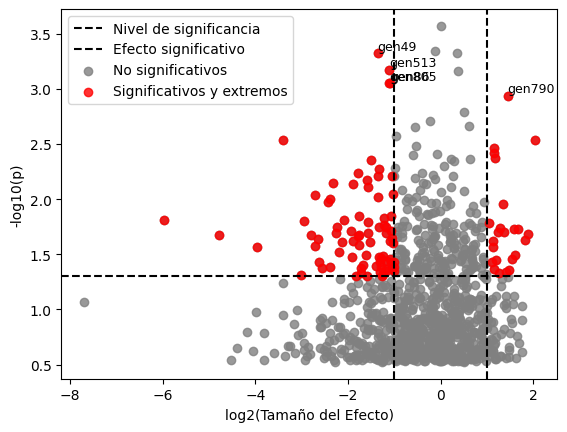

In [ ]:

def volcan(data: pd.DataFrame,
           ef: str,
           p: str,
           eflines: tuple[float|int, float|int]=(-1,1),
           sig: float=0.05,
           eflog2: bool=True,
           noms: str|None=None):
  """
  Genera un gráfico de volcán
  Args:
    data: DataFrame que contiene los datos
    ef: nombre de la columna con los tamaños del efecto
    p: nombre de la columna con la significancia
    eflines: tupla con los rangos significativos de tamaño del efecto
    sig: nivel de significancia
    eflog2: booleano que indica si el tamaño del efecto se transforma

  """
  pline = -np.log10(sig) # linea de significancia en -log10
  d = data.copy() # copiamos los datos para no sobreescribir
  plog = -np.log10(d[p]) # significancia en log10
  xlabel = 'Tamaño del Efecto'
  if eflog2 is True:
    d[ef] = np.log2(d[ef]) # transforma el tamaño del efecto a log2
    xlabel = 'log2(Tamaño del Efecto)'

  # agrega líneas para separar significancias
  plt.axhline(pline, linestyle='--', color='black', label='Nivel de significancia')
  plt.axvline(eflines[0], linestyle='--', color='black',) # sin label para no repetir
  plt.axvline(eflines[1], linestyle='--', color='black', label='Efecto significativo')

  # grafica todo primero como "no significativo"
  plt.scatter(d[ef], plog, c='gray', alpha=0.8, label='No significativos')

  # condiciones para separar extremos
  extr = (
      (d[p] < sig) & ( # por nivel de significancia
        (d[ef] < eflines[0]) | # por efecto hacia abajo (down)
        (d[ef] > eflines[1]) # por efecto hacia arriba (up)
      )
  )
  # grafica los extremos en rojo
  plt.scatter(d[extr][ef], plog[extr], c='red', alpha=0.8, label='Significativos y extremos')
  # agregar texto a los más significativos
  tops = plog[extr].nlargest(5).index
  for g in tops:
    # si tenemos los nombres de los genes, usamos eso, si no, los índices
    label = str(g) if noms is None else d[extr][noms].loc[g]
    plt.text(d[extr][ef].loc[g], plog[extr].loc[g], label, fontsize=9, ha='left', va='bottom')
  plt.ylabel('-log10(p)')
  plt.xlabel(xlabel)
  plt.legend()
  plt.show()

volcan(df_volcano, 'efz', 'ps', noms='gene')

### Visualización interactiva.

In [ ]:
!pip install dash_bio -q

import pandas as pd
from dash import Dash, dcc, html, Input, Output, callback
import dash_bio as dashbio

app = Dash()

df = pd.read_csv('https://git.io/volcano_data1.csv')

app.layout = html.Div([
    'Effect sizes',
    dcc.RangeSlider(
        id='default-volcanoplot-input',
        min=-3,
        max=3,
        step=0.05,
        marks={i: {'label': str(i)} for i in range(-3, 3)},
        value=[-0.5, 1]
    ),
    html.Br(),
    html.Div(
        dcc.Graph(
            id='dashbio-default-volcanoplot',
            figure=dashbio.VolcanoPlot(
                dataframe=df
            )
        )
    )
])

@callback(
    Output('dashbio-default-volcanoplot', 'figure'),
    Input('default-volcanoplot-input', 'value')
)
def update_volcanoplot(effects):
    return dashbio.VolcanoPlot(
        dataframe=df,
        genomewideline_value=2.5,
        effect_size_line=effects
    )

app.run()

<IPython.core.display.Javascript object>